In [5]:
!nvidia-smi


Wed Dec 18 16:23:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Setup for Your Drive
- Clone Remote repo of **MuseTalk** in your Drive
- Create Directory = **Lip-Sync**






In [7]:
%cd /content/drive/MyDrive/Lip-Sync


/content/drive/MyDrive/Lip-Sync


# Clone repo of Musetalk

In [8]:
!git clone https://github.com/TMElyralab/MuseTalk.git

Cloning into 'MuseTalk'...
remote: Enumerating objects: 344, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 344 (delta 99), reused 61 (delta 61), pack-reused 196 (from 2)
Receiving objects: 100% (344/344), 23.95 MiB | 15.85 MiB/s, done.
Resolving deltas: 100% (128/128), done.


## Install Dependcies

In [8]:
pip install -r /content/drive/MyDrive/Lip-Sync/MuseTalk/requirements.txt

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 612.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 92.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━

NOTE:
1. Restart Runtime
2. Run Next cell ( mmpose installation )
3. **Don't Restart run time again**

### Install MMpose

In [1]:
!pip install --no-cache-dir -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0rc4,<2.2.0"
!mim install "mmdet>=3.1.0"
!mim install "mmpose>=1.1.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 185.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 119.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 190.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.6/449.6 kB 136.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 150.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.5/311.5 kB 208.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 145.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 203.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.5/506.5 kB 207.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 1

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.3/452.3 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 7.7 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.4 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.9 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmdet: markers 'extra == "mim"' do

In [2]:
!pip uninstall huggingface_hub

Found existing installation: huggingface-hub 0.26.5
Uninstalling huggingface-hub-0.26.5:
  Would remove:
    /usr/local/bin/huggingface-cli
    /usr/local/lib/python3.10/dist-packages/huggingface_hub-0.26.5.dist-info/*
    /usr/local/lib/python3.10/dist-packages/huggingface_hub/*
Proceed (Y/n)? Y
  Successfully uninstalled huggingface-hub-0.26.5


In [3]:
pip install -q huggingface_hub==0.24.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 8.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.9.1 requires huggingface-hub>=0.25.1, but you have huggingface-hub 0.24.7 which is incompatible.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.39.2 which is incompatible.


In [4]:
pip show huggingface_hub

Name: huggingface-hub
Version: 0.24.7
Summary: Client library to download and publish models, datasets and other repos on the huggingface.co hub
Home-page: https://github.com/huggingface/huggingface_hub
Author: Hugging Face, Inc.
Author-email: julien@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, packaging, pyyaml, requests, tqdm, typing-extensions
Required-by: accelerate, diffusers, gradio, gradio_client, peft, sentence-transformers, timm, tokenizers, transformers


In [5]:
import sys
sys.path.append('/content/drive/MyDrive/Lip-Sync/MuseTalk')


In [6]:
%cd /content/drive/MyDrive/Lip-Sync/MuseTalk

/content/drive/MyDrive/Lip-Sync/MuseTalk


In [7]:
ls

app.py    data/                       ffmpeg-release-amd64-static.tar.xz  README.md
assets/   entrypoint.sh               LICENSE                             requirements.txt
configs/  ffmpeg-7.0.2-amd64-static/  musetalk/                           scripts/


In [12]:
!wget https://johnvansickle.com/ffmpeg/releases/ffmpeg-release-amd64-static.tar.xz
!tar -xvf ffmpeg-release-amd64-static.tar.xz

--2024-12-18 16:05:21--  https://johnvansickle.com/ffmpeg/releases/ffmpeg-release-amd64-static.tar.xz
Resolving johnvansickle.com (johnvansickle.com)... 107.180.57.212
Connecting to johnvansickle.com (johnvansickle.com)|107.180.57.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41888096 (40M) [application/x-xz]
Saving to: ‘ffmpeg-release-amd64-static.tar.xz’

ffmpeg-release-amd6 100%[===================>]  39.95M  57.1MB/s    in 0.7s    

2024-12-18 16:05:22 (57.1 MB/s) - ‘ffmpeg-release-amd64-static.tar.xz’ saved [41888096/41888096]

ffmpeg-7.0.2-amd64-static/
ffmpeg-7.0.2-amd64-static/GPLv3.txt
ffmpeg-7.0.2-amd64-static/manpages/
ffmpeg-7.0.2-amd64-static/manpages/ffmpeg-all.txt
ffmpeg-7.0.2-amd64-static/manpages/ffmpeg-scaler.txt
ffmpeg-7.0.2-amd64-static/manpages/ffmpeg-resampler.txt
ffmpeg-7.0.2-amd64-static/manpages/ffmpeg-filters.txt
ffmpeg-7.0.2-amd64-static/manpages/ffprobe.txt
ffmpeg-7.0.2-amd64-static/manpages/ffmpeg-devices.txt
ffmpeg-7.0.2-amd

In [8]:
!apt-get install -y ffmpeg
import os
os.environ['FFMPEG_PATH'] = '/content/Lip_Sync_Model/models/MuseTalk/MuseTalk/ffmpeg-7.0.1-amd64-static/ffmpeg'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [9]:
!export FFMPEG_PATH=/musetalk/ffmpeg-4.4-amd64-static

In [10]:
ls

app.py    data/                       ffmpeg-release-amd64-static.tar.xz  README.md
assets/   entrypoint.sh               LICENSE                             requirements.txt
configs/  ffmpeg-7.0.2-amd64-static/  musetalk/                           scripts/


## Continue Setup for Drive

# create folder in drive name musetalk in models folder

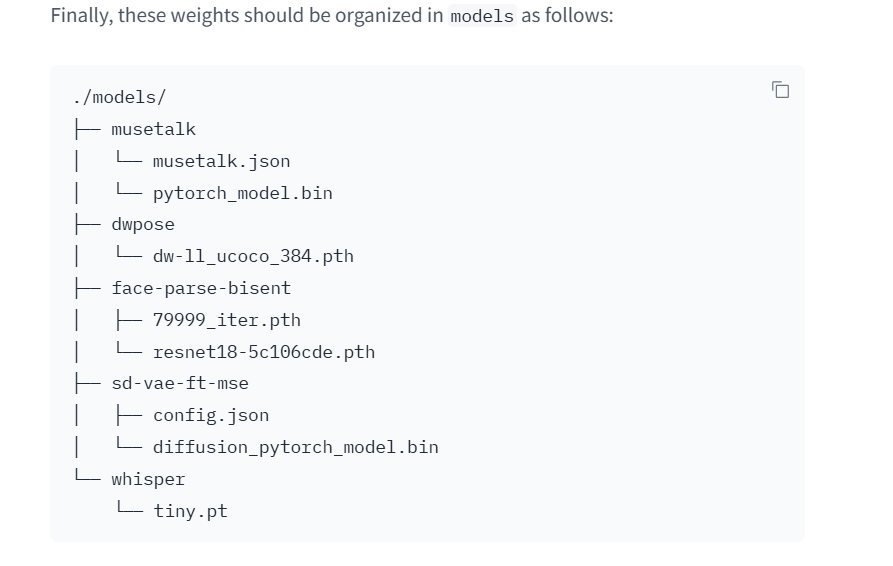

In [16]:
%cd /content


/content


In [17]:
!git clone https://huggingface.co/TMElyralab/MuseTalk /content/temp_MuseTalk


Cloning into '/content/temp_MuseTalk'...
remote: Enumerating objects: 15, done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 15 (from 1)
Unpacking objects: 100% (15/15), 8.73 KiB | 2.18 MiB/s, done.


In [18]:
!ls /content/temp_MuseTalk


musetalk  README.md


In [22]:
# !cp -r /content/temp_MuseTalk/musetalk* /content/drive/MyDrive/Lip-Sync/MuseTalk/musetalk/models/musetalk

In [28]:
%cd /content/drive/MyDrive/Lip-Sync/MuseTalk/musetalk/models/sd-vae-ft-mse

/content/drive/MyDrive/Lip-Sync/MuseTalk/musetalk/models/sd-vae-ft-mse


# sd-vae-ft-mse weights loading

In [29]:
%cd /content

/content


In [30]:
# !git clone https://huggingface.co/stabilityai/sd-vae-ft-mse
!git clone https://huggingface.co/stabilityai/sd-vae-ft-mse /content/sd-vae-ft-mse


Cloning into '/content/sd-vae-ft-mse'...
remote: Enumerating objects: 28, done.
remote: Total 28 (delta 0), reused 0 (delta 0), pack-reused 28 (from 1)
Unpacking objects: 100% (28/28), 4.92 KiB | 559.00 KiB/s, done.
Filtering content: 100% (2/2), 638.34 MiB | 28.58 MiB/s, done.


In [31]:
!cp -r /content/sd-vae-ft-mse /content/drive/MyDrive/Lip-Sync/MuseTalk/musetalk/models/

# dwpose weights loading

In [32]:
%cd /content

/content


In [33]:
# %cd /content/drive/MyDrive/Lip-Sync/MuseTalk/musetalk/models/dwpose
!git clone https://huggingface.co/yzd-v/DWPose /content/DWPose


Cloning into '/content/DWPose'...
remote: Enumerating objects: 18, done.
remote: Total 18 (delta 0), reused 0 (delta 0), pack-reused 18 (from 1)
Unpacking objects: 100% (18/18), 2.40 KiB | 614.00 KiB/s, done.
Filtering content: 100% (10/10), 1.99 GiB | 59.31 MiB/s, done.


In [34]:
!cp -r /content/DWPose /content/drive/MyDrive/Lip-Sync/MuseTalk/musetalk/models/


# face makeout weights

In [35]:
%cd /content

/content


In [36]:
!git clone https://github.com/zllrunning/face-makeup.PyTorch.git /content/face-makeup.PyTorch


Cloning into '/content/face-makeup.PyTorch'...
remote: Enumerating objects: 59, done.
remote: Total 59 (delta 0), reused 0 (delta 0), pack-reused 59 (from 1)
Receiving objects: 100% (59/59), 50.81 MiB | 17.99 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [37]:
!cp -r /content/face-makeup.PyTorch /content/drive/MyDrive/Lip-Sync/MuseTalk/musetalk/models/


In [ ]:
%cd /content/drive/MyDrive/Lip-Sync/MuseTalk

/content/drive/MyDrive/Lip-Sync/MuseTalk


## Inference

In [18]:
import time
from datetime import datetime

#start time
start_time = time.time()

# Get date time of run
current_datetime = datetime.now()
formatted_date = current_datetime.strftime("%A, %d %B %Y, %I:%M:%S %p")


# Add name of video and audio files in config folders test.yaml files

In [19]:
!python -m scripts.inference --inference_config configs/inference/test.yaml

add ffmpeg to path
/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
Loads checkpoint by local backend from path: ./musetalk/models/dwpose/dw-ll_ucoco_384.pth
cuda start
{'task_0': {'video_path': 'data/video/example_video_30sec.mp4', 'audio_path': 'data/audio/example_audio_30sec.mp3', 'bbox_shift': -7}}
video in 24.009324009324008 FPS, audio idx in 50FPS
extracting landmarks...time consuming
reading images...
100% 720/720 [00:42<00:00, 16.84it/s]
get key_landmark and face bounding boxes with the bbox_shift: -7
100% 720/720 [05:27<00:00,  2.20it/s]
********************************************bbox_shift parameter adjustment**********************************************************
Total frame:「720」 Manually adjust range : 

In [20]:
# Capture the end time
end_time = time.time()

# Calculate elapsed time in seconds
elapsed_time = end_time - start_time

# Display the start time, today's date, and elapsed time
print(f"Start Time for dubbing video: {start_time}")
print(f" Day and Date: {formatted_date}")
print(f"Time taken to dubbed full video: {elapsed_time:.2f} seconds")

Start Time for dubbing video: 1734539817.7789915
 Day and Date: Wednesday, 18 December 2024, 04:36:57 PM
Time taken to dubbed full video: 1226.75 seconds


## Conclusion

Conducted 4 experiments:

1. **5 min video, 5 min audio**:  
   The code stops automatically during the image reading process after 1200 images.

2. **3 min video, 3 min audio**:  
   The same issue occurred as in experiment 1.

3. **1 min video, 1 min audio**:  
   The same issue occurred as in experiment 1.

4. **30 sec video, 30 sec audio**:  
   The video dubbing was successful.
